In [1]:
from __future__ import print_function
# Load data and imports
import numpy as np
from sklearn.model_selection import GridSearchCV
from numpy import array, asarray, zeros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard

# Hyperas for hyperparameter selection
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from keras import backend as k
tf.compat.v1.disable_eager_execution()

In [2]:
import os 
os.chdir('/Users/necromancerchenmy/Desktop/honours thesis/thesis/thesis proposal/NLP tutorial')
dataset= np.loadtxt('Pima_data.txt', delimiter=',')
np.random.seed(7)

X= dataset[:,0:8]; y= dataset[:,8]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# 1. Tanh model weights callback
model_t2= Sequential()
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t2.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

weights_dict_t2 = {}  # key: epoch.  value: weights-bias for all layers
weights_callback_t2 = LambdaCallback \
( on_epoch_end=lambda epoch, logs:  weights_dict_t2.update({epoch:model_t2.get_weights()}))

model_t2.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[weights_callback_t2])



Train on 537 samples, validate on 231 samples
Epoch 1/100
537/537 - 0s - loss: 0.6645 - accuracy: 0.6127 - val_loss: 0.6357 - val_accuracy: 0.7013
Epoch 2/100
537/537 - 0s - loss: 0.6288 - accuracy: 0.6518 - val_loss: 0.6030 - val_accuracy: 0.7143


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Epoch 3/100
537/537 - 0s - loss: 0.6000 - accuracy: 0.7076 - val_loss: 0.5785 - val_accuracy: 0.7273
Epoch 4/100
537/537 - 0s - loss: 0.5783 - accuracy: 0.7151 - val_loss: 0.5589 - val_accuracy: 0.7403
Epoch 5/100
537/537 - 0s - loss: 0.5619 - accuracy: 0.7207 - val_loss: 0.5431 - val_accuracy: 0.7489
Epoch 6/100
537/537 - 0s - loss: 0.5487 - accuracy: 0.7337 - val_loss: 0.5303 - val_accuracy: 0.7792
Epoch 7/100
537/537 - 0s - loss: 0.5379 - accuracy: 0.7505 - val_loss: 0.5190 - val_accuracy: 0.7835
Epoch 8/100
537/537 - 0s - loss: 0.5295 - accuracy: 0.7542 - val_loss: 0.5095 - val_accuracy: 0.7922
Epoch 9/100
537/537 - 0s - loss: 0.5215 - accuracy: 0.7523 - val_loss: 0.5029 - val_accuracy: 0.7922
Epoch 10/100
537/537 - 0s - loss: 0.5153 - accuracy: 0.7561 - val_loss: 0.4966 - val_accuracy: 0.7922
Epoch 11/100
537/537 - 0s - loss: 0.5103 - accuracy: 0.7598 - val_loss: 0.4916 - val_accuracy: 0.7835
Epoch 12/100
537/537 - 0s - loss: 0.5052 - accuracy: 0.7635 - val_loss: 0.4865 - val_accu

Epoch 84/100
537/537 - 0s - loss: 0.4513 - accuracy: 0.7933 - val_loss: 0.4635 - val_accuracy: 0.7879
Epoch 85/100
537/537 - 0s - loss: 0.4511 - accuracy: 0.7914 - val_loss: 0.4634 - val_accuracy: 0.7965
Epoch 86/100
537/537 - 0s - loss: 0.4502 - accuracy: 0.7933 - val_loss: 0.4641 - val_accuracy: 0.7922
Epoch 87/100
537/537 - 0s - loss: 0.4506 - accuracy: 0.7970 - val_loss: 0.4654 - val_accuracy: 0.7922
Epoch 88/100
537/537 - 0s - loss: 0.4500 - accuracy: 0.7970 - val_loss: 0.4631 - val_accuracy: 0.7965
Epoch 89/100
537/537 - 0s - loss: 0.4496 - accuracy: 0.7970 - val_loss: 0.4635 - val_accuracy: 0.7965
Epoch 90/100
537/537 - 0s - loss: 0.4495 - accuracy: 0.7933 - val_loss: 0.4636 - val_accuracy: 0.7965
Epoch 91/100
537/537 - 0s - loss: 0.4492 - accuracy: 0.7933 - val_loss: 0.4621 - val_accuracy: 0.7965
Epoch 92/100
537/537 - 0s - loss: 0.4488 - accuracy: 0.7933 - val_loss: 0.4637 - val_accuracy: 0.7965
Epoch 93/100
537/537 - 0s - loss: 0.4480 - accuracy: 0.7952 - val_loss: 0.4630 - v

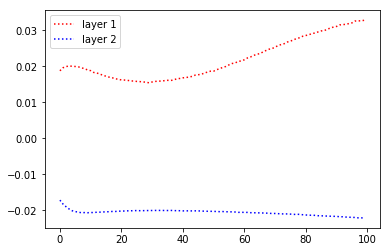

In [23]:
# Access and visualise the weights
weights_t2_L1= []
for epoch, weights in weights_dict_t2.items():
    weights_t2_L1.append(weights[0])
weights_t2_L2= []
for epoch, weights in weights_dict_t2.items():
    weights_t2_L2.append(weights[2])
    
t2_aveW_L1= [np.mean(W) for W in weights_t2_L1]
t2_aveW_L2= [np.mean(W) for W in weights_t2_L2]
epochs= [ep for ep in range(100)]
plt.plot(epochs, t2_aveW_L1, linestyle='dotted', color= 'red', label='layer 1')
plt.plot(epochs, t2_aveW_L2, linestyle='dotted', color= 'blue', label='layer 2')
plt.legend()
plt.show()


In [17]:
# 2. Callback the outputs
# 2.1 Model.Layers.output object
model_t2.layers[0].output
# output to the 1st layer is a Tensor variable object. 
# We need to fit the inputs to this variable to obtain the output values, with backend.function

<tf.Tensor 'dense_3/Tanh:0' shape=(None, 8) dtype=float32>

In [24]:
model_t2= Sequential()
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t2.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

t2_activations= []
def save_act(model):
    output_vars= [layer.output for layer in model.layers]
    get_outputs_funcs= [k.function([model.input], [out]) for out in output_vars]
    # Fit these functions
    layers_acts= [f([X]) for f in get_outputs_funcs]
    t2_activations.append(layers_acts)
# Save activations for all layers for each epoch:
activations_callback_t2=  LambdaCallback \
( on_epoch_end=lambda epoch, logs:  save_act(model_t2))

model_t2.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[activations_callback_t2])


Train on 537 samples, validate on 231 samples
Epoch 1/100


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



537/537 - 0s - loss: 0.6519 - accuracy: 0.6071 - val_loss: 0.6380 - val_accuracy: 0.6147
Epoch 2/100
537/537 - 0s - loss: 0.6252 - accuracy: 0.6369 - val_loss: 0.6087 - val_accuracy: 0.6450
Epoch 3/100
537/537 - 0s - loss: 0.6055 - accuracy: 0.6611 - val_loss: 0.5857 - val_accuracy: 0.6926
Epoch 4/100
537/537 - 0s - loss: 0.5901 - accuracy: 0.6723 - val_loss: 0.5676 - val_accuracy: 0.7100
Epoch 5/100
537/537 - 0s - loss: 0.5776 - accuracy: 0.6816 - val_loss: 0.5534 - val_accuracy: 0.7143
Epoch 6/100
537/537 - 0s - loss: 0.5676 - accuracy: 0.6983 - val_loss: 0.5404 - val_accuracy: 0.7013
Epoch 7/100
537/537 - 0s - loss: 0.5586 - accuracy: 0.7114 - val_loss: 0.5288 - val_accuracy: 0.7186
Epoch 8/100
537/537 - 0s - loss: 0.5509 - accuracy: 0.7188 - val_loss: 0.5183 - val_accuracy: 0.7446
Epoch 9/100
537/537 - 0s - loss: 0.5442 - accuracy: 0.7151 - val_loss: 0.5083 - val_accuracy: 0.7532
Epoch 10/100
537/537 - 0s - loss: 0.5380 - accuracy: 0.7132 - val_loss: 0.5002 - val_accuracy: 0.7706
E

Epoch 82/100
537/537 - 0s - loss: 0.4532 - accuracy: 0.7933 - val_loss: 0.4397 - val_accuracy: 0.7835
Epoch 83/100
537/537 - 0s - loss: 0.4530 - accuracy: 0.7914 - val_loss: 0.4388 - val_accuracy: 0.7835
Epoch 84/100
537/537 - 0s - loss: 0.4525 - accuracy: 0.7914 - val_loss: 0.4387 - val_accuracy: 0.7835
Epoch 85/100
537/537 - 0s - loss: 0.4520 - accuracy: 0.7914 - val_loss: 0.4395 - val_accuracy: 0.7835
Epoch 86/100
537/537 - 0s - loss: 0.4513 - accuracy: 0.7952 - val_loss: 0.4400 - val_accuracy: 0.7792
Epoch 87/100
537/537 - 0s - loss: 0.4512 - accuracy: 0.7914 - val_loss: 0.4393 - val_accuracy: 0.7792
Epoch 88/100
537/537 - 0s - loss: 0.4506 - accuracy: 0.7933 - val_loss: 0.4387 - val_accuracy: 0.7835
Epoch 89/100
537/537 - 0s - loss: 0.4501 - accuracy: 0.7896 - val_loss: 0.4408 - val_accuracy: 0.7792
Epoch 90/100
537/537 - 0s - loss: 0.4497 - accuracy: 0.7896 - val_loss: 0.4397 - val_accuracy: 0.7792
Epoch 91/100
537/537 - 0s - loss: 0.4492 - accuracy: 0.7896 - val_loss: 0.4400 - v

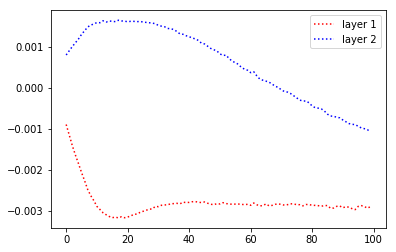

In [26]:
# Access the activations
n_layers= 2; n_epochs =100
layer_sizes= [10,10]; input_size= X.shape[0]
t2_act_layers= np.zeros((n_layers, n_epochs))
for ep in range(n_epochs):
    for layer in range(n_layers):
        layer_outs_wrt_inputs= np.zeros((layer_sizes[layer], input_size))
        for i in range(input_size):
            perlayer_outs= t2_activations[ep][layer][0][i]
            layer_outs_wrt_inputs[layer, i]= np.mean(perlayer_outs)
        ave_over_inputs= np.mean(layer_outs_wrt_inputs)
        t2_act_layers[layer, ep]= ave_over_inputs
acts_L1= t2_act_layers[0]; acts_L2= t2_act_layers[1]
plt.plot(epochs, acts_L1, linestyle= 'dotted', color= 'red', label= 'layer 1')
plt.plot(epochs, acts_L2, linestyle= 'dotted', color= 'blue', label= 'layer 2')
plt.legend()
plt.show()
    


In [9]:
# 3. Tanh model with per-epoch gradients callback
model_t2= Sequential()
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(8, input_dim= 8, activation= 'tanh'))
model_t2.add(Dense(1, input_dim= 8, activation= 'sigmoid'))
model_t2.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

sess = k.get_session()
grads_dict_t2= {}
def save_grads(model, epoch):
    # weight variables for each layer
    weights_vars= [layer.trainable_weights for layer in model.layers]
    # function for output gradients for each weight variable
    get_grads_layers= [k.gradients(model.output, weight) for weight in weights_vars]
    # fit functions to compute gradients for each weight
    grads= [ sess.run(get_grad, feed_dict={model.input: X}) for get_grad in get_grads_layers]
    grads_dict_t2.update({epoch:grads})
    
grads_callback_t2= LambdaCallback \
( on_epoch_end=lambda epoch, logs: save_grads(model_t2, epoch))

model_t2.fit(X,y, batch_size= 32, epochs= 100, validation_split= 0.3, verbose= 2, 
            callbacks=[grads_callback_t2])


Train on 537 samples, validate on 231 samples
Epoch 1/100
537/537 - 0s - loss: 0.9506 - accuracy: 0.3128 - val_loss: 0.9193 - val_accuracy: 0.2771


/Users/necromancerchenmy/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Epoch 2/100
537/537 - 0s - loss: 0.8543 - accuracy: 0.3687 - val_loss: 0.8308 - val_accuracy: 0.3463
Epoch 3/100
537/537 - 0s - loss: 0.7784 - accuracy: 0.4525 - val_loss: 0.7661 - val_accuracy: 0.4242
Epoch 4/100
537/537 - 0s - loss: 0.7244 - accuracy: 0.5158 - val_loss: 0.7170 - val_accuracy: 0.5108
Epoch 5/100
537/537 - 0s - loss: 0.6835 - accuracy: 0.5829 - val_loss: 0.6805 - val_accuracy: 0.5714
Epoch 6/100
537/537 - 0s - loss: 0.6529 - accuracy: 0.6108 - val_loss: 0.6518 - val_accuracy: 0.6061
Epoch 7/100
537/537 - 0s - loss: 0.6295 - accuracy: 0.6499 - val_loss: 0.6273 - val_accuracy: 0.6320
Epoch 8/100
537/537 - 0s - loss: 0.6101 - accuracy: 0.6741 - val_loss: 0.6077 - val_accuracy: 0.6623
Epoch 9/100
537/537 - 0s - loss: 0.5949 - accuracy: 0.6909 - val_loss: 0.5905 - val_accuracy: 0.6883
Epoch 10/100
537/537 - 0s - loss: 0.5815 - accuracy: 0.6890 - val_loss: 0.5759 - val_accuracy: 0.6970
Epoch 11/100
537/537 - 0s - loss: 0.5702 - accuracy: 0.6909 - val_loss: 0.5622 - val_accur

Epoch 83/100
537/537 - 0s - loss: 0.4591 - accuracy: 0.7784 - val_loss: 0.4356 - val_accuracy: 0.7792
Epoch 84/100
537/537 - 0s - loss: 0.4588 - accuracy: 0.7784 - val_loss: 0.4352 - val_accuracy: 0.7792
Epoch 85/100
537/537 - 0s - loss: 0.4582 - accuracy: 0.7784 - val_loss: 0.4350 - val_accuracy: 0.7749
Epoch 86/100
537/537 - 0s - loss: 0.4579 - accuracy: 0.7765 - val_loss: 0.4350 - val_accuracy: 0.7706
Epoch 87/100
537/537 - 0s - loss: 0.4573 - accuracy: 0.7784 - val_loss: 0.4352 - val_accuracy: 0.7749
Epoch 88/100
537/537 - 0s - loss: 0.4571 - accuracy: 0.7803 - val_loss: 0.4351 - val_accuracy: 0.7749
Epoch 89/100
537/537 - 0s - loss: 0.4564 - accuracy: 0.7784 - val_loss: 0.4353 - val_accuracy: 0.7749
Epoch 90/100
537/537 - 0s - loss: 0.4564 - accuracy: 0.7803 - val_loss: 0.4350 - val_accuracy: 0.7749
Epoch 91/100
537/537 - 0s - loss: 0.4557 - accuracy: 0.7803 - val_loss: 0.4358 - val_accuracy: 0.7749
Epoch 92/100
537/537 - 0s - loss: 0.4556 - accuracy: 0.7821 - val_loss: 0.4353 - v

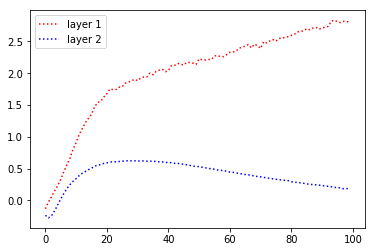

In [21]:
len(grads_dict_t2)  # 100 for 100 epochs
grads_dict_t2[0]    # output grads on the 1st epoch: first 2 weight-bias combo are for 1st and 2nd layers
# for each epoch, we need weight-bias for all hidden layers
n_hid= 2
n_epochs= 100

grads_t2_arr= np.zeros((n_hid, n_epochs))
for ep in range(n_epochs):
    for l in range(n_hid):
        # grads for all hidden layers on the current epoch
        all_hid_grads= grads_dict_t2[ep][:n_hid]
        # from current layer [l] grads, extract the weight [0]
        grad_perlayer= all_hid_grads[l][0]
        # save average output gradient
        grads_t2_arr[l,ep]= np.mean(grad_perlayer)
        
epochs= [ep for ep in range(n_epochs)]
plt.plot(epochs, grads_t2_arr[0], linestyle= 'dotted', color= 'red', label='layer 1')
plt.plot(epochs, grads_t2_arr[1], linestyle= 'dotted', color= 'blue', label='layer 2')
plt.legend()
plt.show()

